# **Analysis of Stock**
  we are *collecting , cleaning , mapping* the stock of intrest : **AMD** 
  
  the data collected is from **2010-1-1 upto Present**

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing modules

import pandas as pd
import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [ ]:
# collect data :

company = 'AMD'

end = date.today() 
data = pdr.get_data_yahoo(company, start='2010-01-01', end=end)

print(data)
print('shape : ', data.shape)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    9.790000    9.900000    9.680000    9.700000    9.700000   
2010-01-05    9.710000    9.900000    9.680000    9.710000    9.710000   
2010-01-06    9.680000    9.760000    9.550000    9.570000    9.570000   
2010-01-07    9.510000    9.550000    9.180000    9.470000    9.470000   
2010-01-08    9.370000    9.470000    9.290000    9.430000    9.430000   
...                ...         ...         ...         ...         ...   
2022-06-03  105.800003  109.389999  104.650002  106.300003  106.300003   
2022-06-06  108.269997  109.570000  104.230003  105.650002  105.650002   
2022-06-07  104.239998  106.239998  102.610001  105.279999  105.279999   
2022-06-08  104.570000  105.849998  100.410004  101.900002  101.900002   
2022-06-09  101.570000  103.940002   98.739

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3.131000e+03
mean,24.875848,25.383596,24.334299,24.863766,24.863766,4.318217e+07
std,34.380015,35.089903,33.598997,34.347542,34.347542,3.596037e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.950000,4.020000,3.880000,3.960000,3.960000,1.699825e+07
50%,8.270000,8.430000,8.100000,8.240000,8.240000,3.334920e+07
75%,28.485000,28.950001,27.760000,28.405000,28.405000,5.654395e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


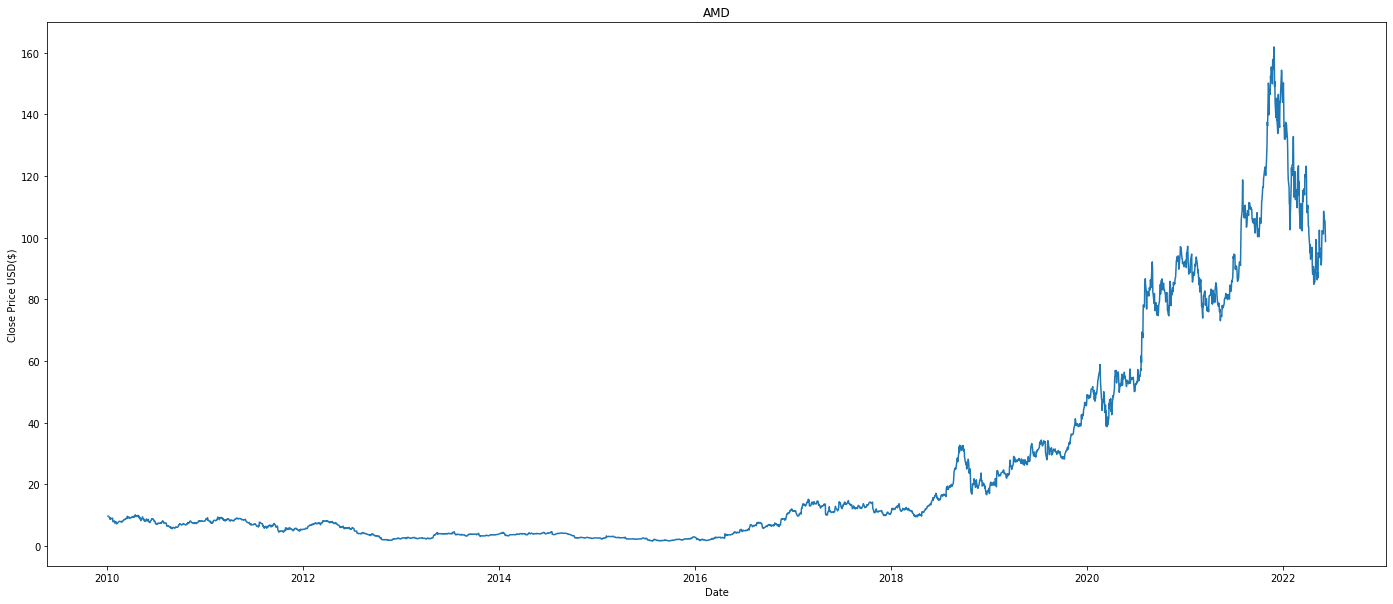

In [ ]:
# Visualize the closing price history, 

plt.figure(figsize=(24,10))
plt.title(company)
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.show()

# **Preparing The data**
  To predict the stock price of the following data taking into consideration the prev 60 days data

In [ ]:
# import modules

import math
import numpy as np

from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM

In [ ]:
# create dataframe 'df' 

df = data.filter(['Close'])
df

,Close
Date,
2010-01-04,9.700000
2010-01-05,9.710000
2010-01-06,9.570000
2010-01-07,9.470000
2010-01-08,9.430000
...,...
2022-06-03,106.300003
2022-06-06,105.650002
2022-06-07,105.279999


In [ ]:
# convert df to numpy array
dataset = df.values
dataset

array([[  9.69999981],
       [  9.71000004],
       [  9.56999969],
       ...,
       [105.27999878],
       [101.90000153],
       [ 98.80000305]])

In [ ]:
# passing the data towards training 

training_data_len = math.ceil(len(dataset) * 0.8 ) # ~approx. 80% of the data
training_data_len

2505

In [ ]:
# Scale the data (preprocess data before sending to model)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.05040863],
       [0.05047102],
       [0.0495976 ],
       ...,
       [0.64670283],
       [0.62561607],
       [0.60627613]])

In [ ]:
# creating the training dataset

train_data = scaled_dataset[:training_data_len, : ]

# split train_data into x_train and y_train

x_train = []  # to be independent training var.
y_train = []  # to be dependent training var.

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) # data(0....59) 60 values
  y_train.append(train_data[i, 0])      # 61st value
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.05040863, 0.05047102, 0.0495976 , 0.04897374, 0.04872419,
       0.04691497, 0.043858  , 0.04697735, 0.04604155, 0.04504336,
       0.04610394, 0.04523052, 0.04597916, 0.03905421, 0.04023956,
       0.04036434, 0.04098821, 0.03905421, 0.03643396, 0.03967808,
       0.03924137, 0.0386175 , 0.03474952, 0.03574771, 0.03618442,
       0.03693306, 0.03755693, 0.03880467, 0.03899183, 0.04017718,
       0.03999002, 0.03949092, 0.03936615, 0.03917899, 0.03849273,
       0.04011479, 0.0391166 , 0.03924137, 0.04111298, 0.04217356,
       0.0419864 , 0.0429222 , 0.04360846, 0.04379562, 0.04373323,
       0.04554245, 0.04572961, 0.04560484, 0.04554245, 0.04853702,
       0.05022147, 0.04847464, 0.0467278 , 0.04797555, 0.04884896,
       0.04747644, 0.04622871, 0.04616633, 0.0467278 , 0.047726  ])]
[0.047725998368239125]



In [ ]:
# convert x_train, y_train to np arrays

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)

(2445, 60)


In [ ]:
# reshape the data
 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
                              # no. rows       , no. col (60)    , no.of feature: 'Close'
x_train.shape

(2445, 60, 1)

# **Building The Model**

In [ ]:
# imports

import math
import numpy as np
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from keras.backend import dropout

In [ ]:
# Build LSTM model

model = Sequential()

model.add(LSTM (50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
              # no. nueorons , return to next.. , for 1st lyr : input_shape
model.add(Dense(50))
model.add(LSTM (25, return_sequences= False))
model.add(Dense(25))
#model.add(LSTM (25, return_sequences= False))
model.add(Dense(1))

In [ ]:
# compile the model

model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size= 1, epochs= 1)

2445/2445 [==============================] - 85s 33ms/step - loss: 1.2900e-04


# **Testing the model**

In [ ]:
# create testing data set

test_data = scaled_dataset[training_data_len- 60: , : ]
len(test_data)

686

In [ ]:
#create x_test , y_test

x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# covert data to np array
x_test = np.array(x_test)

# reshape data to 3d 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the models predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# get the root_mean_squared_error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.202801201671076

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


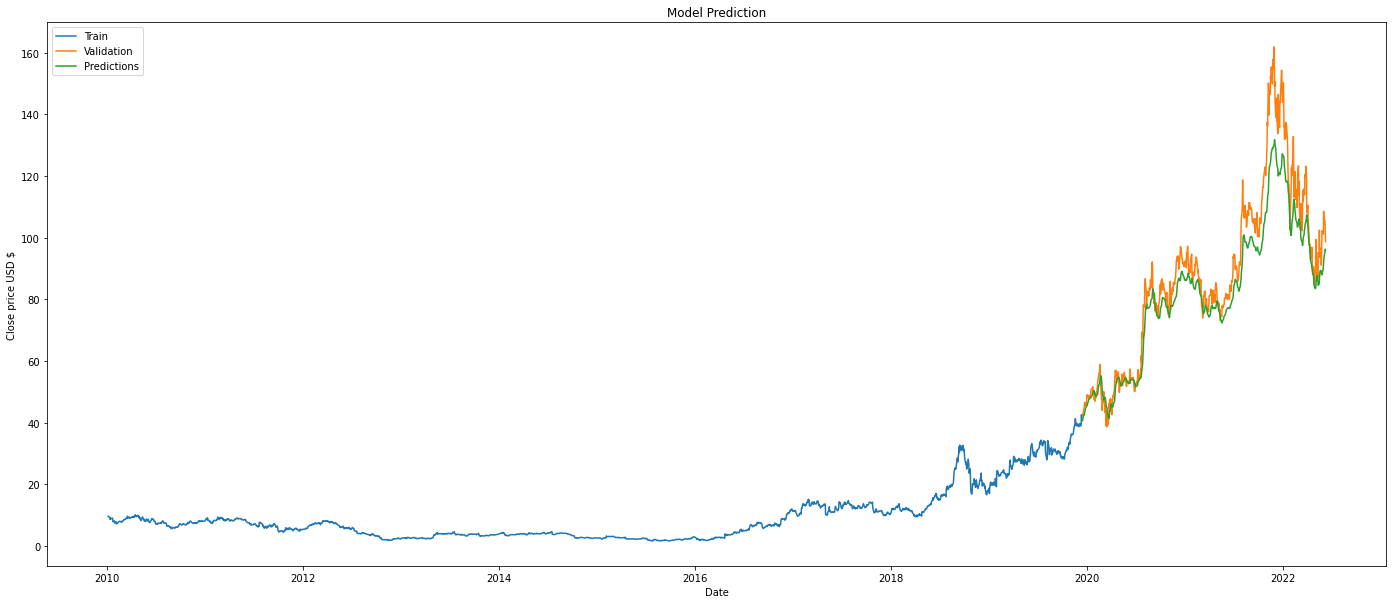

In [ ]:
# plot data

train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# visualize
plt.figure(figsize= (24,10))
plt.title('Model Prediction')
plt.xlabel('Date')
plt.ylabel('Close price USD $')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
# show the predicted and actual price
valid

,Close,Predictions
Date,,
2019-12-16,42.349998,40.651585
2019-12-17,42.770000,41.115871
2019-12-18,42.299999,41.595520
2019-12-19,42.830002,41.937027
2019-12-20,44.150002,42.242962
...,...,...
2022-06-03,106.300003,93.571587
2022-06-06,105.650002,94.905434
2022-06-07,105.279999,95.774628
